In [156]:
from vae.models.simple_vae import string_to_parameter
import pathlib
import pandas as pd
import numpy as np

import seaborn as sns

from matplotlib import pyplot as plt

In [203]:
path = pathlib.Path('vae/stored_models/annealing/')
res = {}

for x in path.glob('*ann*csv'):
    res[str(x)] = pd.read_csv(x).loc[:, ['validation_loss', 'train_loss', 'beta']]

df = res['vae/stored_models/annealing/annealing.csv']

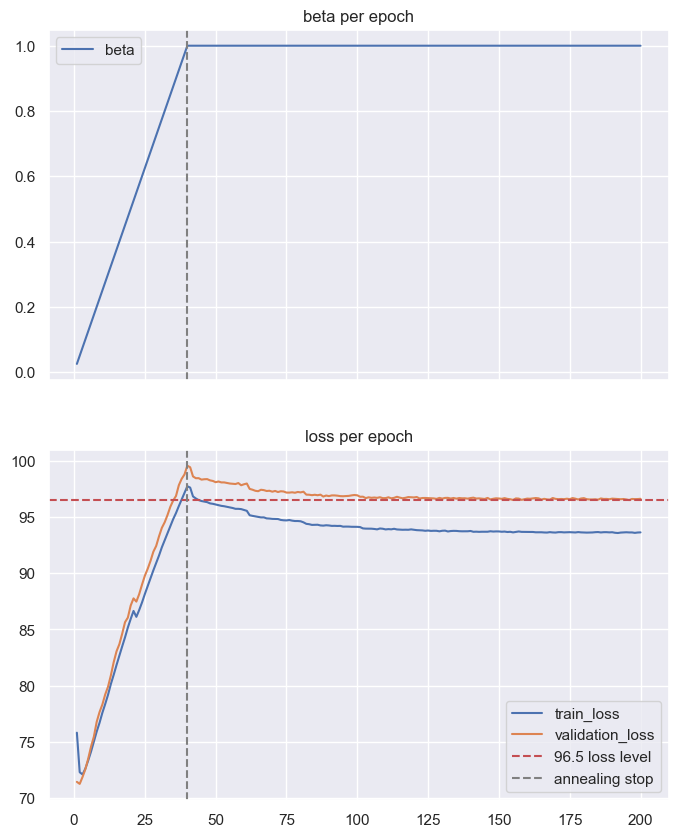

In [231]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

df.iloc[1:].loc[:, ['beta']].plot(ax=ax[0], title='beta per epoch')
df.iloc[1:].loc[:, ['train_loss', 'validation_loss']].plot(ax=ax[1], title='loss per epoch')
ax[1].axhline(96.5, color='r', linestyle='--', label='96.5 loss level')
ax[1].axvline(40, color='grey', linestyle='--', label='annealing stop')
ax[0].axvline(40, color='grey', linestyle='--', label='annealing stop')

ax[1].legend()

plt.savefig('annealing.pdf')

In [221]:
df.iloc[40:].validation_loss.min()

96.52269466145832

In [164]:
training_00 = pd.read_csv(path / df.iloc[0].path).loc[:, ['train_loss', 'validation_loss']].iloc[1:]
training_01 = pd.read_csv(path / df.iloc[1].path).loc[:, ['train_loss', 'validation_loss']].iloc[1:]
training_75 = pd.read_csv(path / df.iloc[-1].path).loc[:, ['train_loss', 'validation_loss']].iloc[1:]

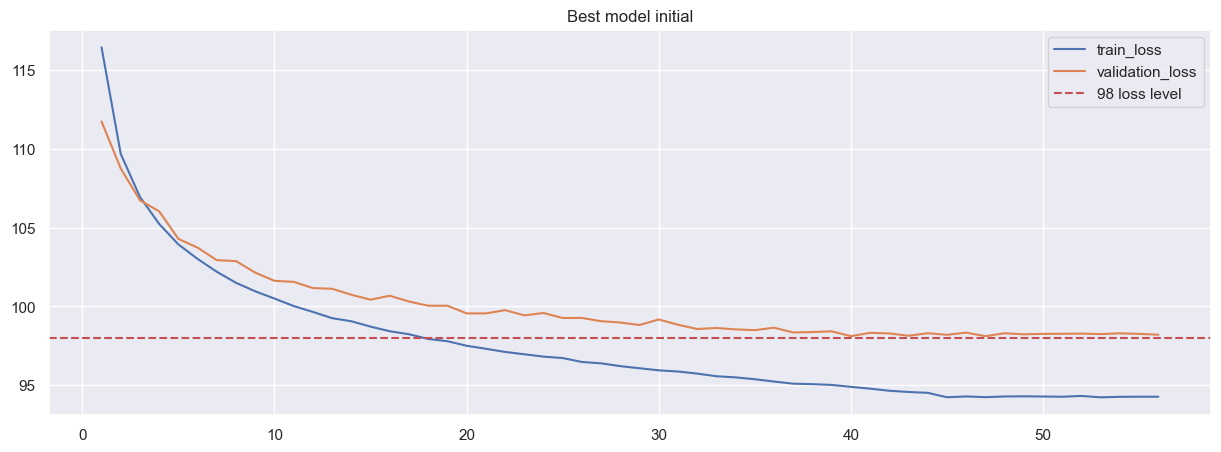

In [184]:
sns.set_theme()

fig, ax = plt.subplots(1, 1, figsize=(15, 5), sharey=True)

training_00.plot(ax=ax, title='Best model initial')
# training_50.plot(ax=ax[1], title='Gamma 0.10')
# training_75.plot(ax=ax[2], title='Gamma 0.75')

ax.axhline(98, color='r', linestyle='--', label='98 loss level')
# ax[1].axhline(95, color='r', linestyle='--', label='95 loss level')
# ax[2].axhline(95, color='r', linestyle='--', label='95 loss level')

ax.legend()
# ax[1].legend()
# ax[2].legend()

plt.savefig('best_model_initial.pdf')